In [1]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("dataset_test_investing_crypto.csv", encoding="ISO-8859-1", sep=';', header=0)
data

,CLASSES,TEXT
0,GOOD,While P2E gaming platforms combine the metaver...
1,BAD,Ethereum's co-founder Gavin Wood said cryptoc...
2,GOOD,Binance Coins (BNB) price posted 1.63% gains ...
3,BAD,Digital asset investment products saw $141 mil...
4,BAD,Cardano was trading at $0.4936 by 10:11 (14:1...
...,...,...
262,GOOD,"In its first major financing round, Ethereum s..."
263,GOOD,Cryptocurrencies traded in the green early tod...
264,GOOD,One of the methods through which the governmen...
265,GOOD,Cryptocurrencies traded in the green early on ...


In [3]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [4]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['TEXT'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

import gensim
data['no_stopwords']=data['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords2']=data['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,CLASSES,TEXT,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,GOOD,While P2E gaming platforms combine the metaver...,While P2E gaming platforms combine the metaver...,while p2e gaming platforms combine the metaver...,"[while, gaming, platforms, combine, the, metav...","[gaming, platforms, combine, metaverse, web, o...","[game, platform, combin, metavers, web, offer,...","[game, platform, combin, metavers, web, offer,...",game platform combin metavers web offer medium...
1,BAD,Ethereum's co-founder Gavin Wood said cryptoc...,Ethereums cofounder Gavin Wood said cryptocur...,ethereums cofounder gavin wood said cryptocur...,"[ethereums, cofounder, gavin, wood, said, cryp...","[ethereums, cofounder, gavin, wood, said, cryp...","[ethereum, cofound, gavin, wood, said, cryptoc...","[ethereum, cofound, gavin, wood, said, cryptoc...",ethereum cofound gavin wood said cryptocurr in...
2,GOOD,Binance Coins (BNB) price posted 1.63% gains ...,Binance Coins BNB price posted 163 gains in t...,binance coins bnb price posted 163 gains in t...,"[binance, coin, bnb, price, posted, gains, in,...","[binance, coin, bnb, price, posted, gains, las...","[binanc, coin, bnb, price, post, gain, last, h...","[binanc, coin, bnb, price, post, gain, last, h...",binanc coin bnb price post gain last hour take...
3,BAD,Digital asset investment products saw $141 mil...,Digital asset investment products saw 141 mill...,digital asset investment products saw 141 mill...,"[digital, asset, investment, products, saw, mi...","[digital, asset, investment, products, saw, mi...","[digit, asset, invest, product, saw, million, ...","[digit, asset, invest, product, saw, million, ...",digit asset invest product saw million outflow...
4,BAD,Cardano was trading at $0.4936 by 10:11 (14:1...,Cardano was trading at 04936 by 1011 1411 GMT...,cardano was trading at 04936 by 1011 1411 gmt...,"[cardano, was, trading, at, by, gmt, on, the, ...","[cardano, trading, gmt, investingcom, index, t...","[cardano, trade, gmt, investingcom, index, tue...","[cardano, trade, gmt, investingcom, index, tue...",cardano trade gmt investingcom index tuesday d...


In [5]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
# TfId

v = TfidfVectorizer(token_pattern=r"\b\w+\b")
X = v.fit_transform(data['msg_lemmatized_string'])

y = data['CLASSES'].to_list()

print(X.toarray())
## pd.DataFrame(X).to_excel("TEMP.xlsx", index=False) # save a xlsx file to see the tokenized data


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 2730)	0.1094828253743471
  (0, 1105)	0.1020879506833831
  (0, 1301)	0.12962075773614576
  (0, 488)	0.12962075773614576
  (0, 1551)	0.12070958070672119
  (0, 310)	0.2592415154722915
  (0, 3050)	0.1020879506833831
  (0, 1575)	0.1094828253743471
  (0, 31)	0.10547582295568818
  (0, 3373)	0.08533789059388953
  (0, 483)	0.21095164591137636
  (0, 2649)	0.08848291324871652
  (0, 1685)	0.11438699998511276
  (0, 2794)	0.0942490676233141
  (0, 2694)	0.08258709674722202
  (0, 1612)	0.1094828253743471
  (0, 1397)	0.0921543722525942
  (0, 597)	0.17370838586470017
  (0, 1518)	0.07162043518131707
  (0, 1952)	0.2041759013667662
  (0, 2681)	0.09915324223407976
  (0, 3284)	0.07794301590292552
  (0, 1710)	0.07241971114580606
  (0, 3251)	0.06735333899618902
  (0, 1813)	0.11438699998511276
  :	:
  (185, 1518)	0.06636388888219066
  (185, 2998)	0.09459525620321717
  (185, 495)	0.06564926724976097
  (185, 622)	0.05375738641866218
  (185, 3005)	0.09773447727129803
  (185, 850)	0.08733170407536568
  (185, 

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.53
F1-Score: 0.531
Precision: 0.533
Recall: 0.531


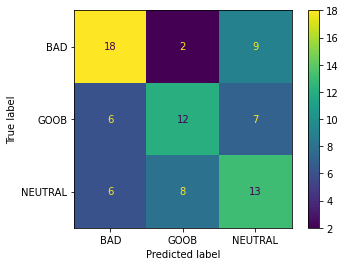

In [8]:
svm = SVC().fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print('F1-Score: %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision: %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall: %.3f'%recall_score(y_test, y_pred, average="weighted"))
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [9]:
param_dist={
    'C':[0.5,1.0,2.0, 3.0],  # penalty parameter C of the error term
    "kernel":['linear','poly','rbf','sigmoid'], # specifies the kernel type to be used in the algorithm  
    'gamma':[0.02, 0.08,0.2,1.0]
}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid=GridSearchCV(svm,param_grid=param_dist,cv=5,n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0, 3.0],
                         'gamma': [0.02, 0.08, 0.2, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [13]:
grid.best_estimator_

SVC(C=2.0, gamma=1.0, kernel='sigmoid')

In [14]:
grid.best_score_

0.6829302987197725

In [15]:
grid.best_params_

{'C': 2.0, 'gamma': 1.0, 'kernel': 'sigmoid'}

In [16]:
svm = SVC(C=2.0, gamma=1.0, kernel='linear')

In [17]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(svm, X, y, cv=5,scoring=scoring)
scores

{'fit_time': array([0.07678986, 0.02296209, 0.0209434 , 0.02293825, 0.02194095]),
 'score_time': array([0.00797844, 0.00596094, 0.00698185, 0.00598407, 0.00598454]),
 'test_accuracy': array([0.51851852, 0.44444444, 0.52830189, 0.60377358, 0.62264151]),
 'test_f1_macro': array([0.51679198, 0.44407895, 0.52832244, 0.59685224, 0.60095579]),
 'test_precision_macro': array([0.51898148, 0.46428571, 0.53897059, 0.60790598, 0.61172161]),
 'test_recall_macro': array([0.51846119, 0.45      , 0.52647059, 0.59855521, 0.6119711 ])}

In [19]:
data2=pd.read_excel("merge_crypto.xlsx")
data2

,Text,Date,Year
0,Zilliqa's 'metaverse' debut pumps ZIL price 35...,Apr 01,2022
1,Warren’s battle to curtail crypto gets boost f...,Apr 01,2022
2,VanEck says Bitcoin could hit $4.8M if it beca...,Apr 01,2022
3,US grassroots adoption: the Bitcoin Lightning ...,Apr 01,2022
4,TrueUSD and Balancer Offer Liquidity Providers...,Apr 01,2022
...,...,...,...
43838,© Reuters. XRP Price Lost 66% Against BTC in 2...,Dec 31,2019
43839,© Reuters. Worst Bitcoin Price Prediction of 2...,Dec 31,2019
43840,© Reuters. Vexed Tech Entrepreneur Turns Bitco...,Dec 31,2019
43841,© Reuters. Ethereum Network Overcame Intention...,Dec 31,2019


In [20]:
data2['Text'] = data2['Text'].astype(str)
data2

,Text,Date,Year
0,Zilliqa's 'metaverse' debut pumps ZIL price 35...,Apr 01,2022
1,Warren’s battle to curtail crypto gets boost f...,Apr 01,2022
2,VanEck says Bitcoin could hit $4.8M if it beca...,Apr 01,2022
3,US grassroots adoption: the Bitcoin Lightning ...,Apr 01,2022
4,TrueUSD and Balancer Offer Liquidity Providers...,Apr 01,2022
...,...,...,...
43838,© Reuters. XRP Price Lost 66% Against BTC in 2...,Dec 31,2019
43839,© Reuters. Worst Bitcoin Price Prediction of 2...,Dec 31,2019
43840,© Reuters. Vexed Tech Entrepreneur Turns Bitco...,Dec 31,2019
43841,© Reuters. Ethereum Network Overcame Intention...,Dec 31,2019


In [21]:
# data preprocess

# remove punctuation from Text column - create a new column 
data2['clean_msg']=data2['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data2['msg_lower']=data2['clean_msg'].apply(lambda x: x.lower())

import gensim
data2['no_stopwords']=data2['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data2['no_stopwords2']=data2['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data2['msg_stemmed']=data2['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data2['msg_lemmatized']=data2['msg_stemmed'].apply(lambda x:lemmatizer(x))

data2['msg_lemmatized_string']=data2['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data2.head()

,Text,Date,Year,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,Zilliqa's 'metaverse' debut pumps ZIL price 35...,Apr 01,2022,Zilliqas metaverse debut pumps ZIL price 350 i...,zilliqas metaverse debut pumps zil price 350 i...,"[zilliqas, metaverse, debut, pumps, zil, price...","[zilliqas, metaverse, debut, pumps, zil, price...","[zilliqa, metavers, debut, pump, zil, price, f...","[zilliqa, metavers, debut, pump, zil, price, f...",zilliqa metavers debut pump zil price five day...
1,Warren’s battle to curtail crypto gets boost f...,Apr 01,2022,Warren’s battle to curtail crypto gets boost f...,warren’s battle to curtail crypto gets boost f...,"[warren, battle, to, curtail, crypto, gets, bo...","[warren, battle, curtail, crypto, gets, boost,...","[warren, battl, curtail, crypto, get, boost, u...","[warren, battl, curtail, crypto, get, boost, u...",warren battl curtail crypto get boost ukrain c...
2,VanEck says Bitcoin could hit $4.8M if it beca...,Apr 01,2022,VanEck says Bitcoin could hit 48M if it became...,vaneck says bitcoin could hit 48m if it became...,"[vaneck, says, bitcoin, could, hit, if, it, be...","[vaneck, says, bitcoin, could, hit, became, gl...","[vaneck, say, bitcoin, could, hit, becam, glob...","[vaneck, say, bitcoin, could, hit, becam, glob...",vaneck say bitcoin could hit becam global rese...
3,US grassroots adoption: the Bitcoin Lightning ...,Apr 01,2022,US grassroots adoption the Bitcoin Lightning p...,us grassroots adoption the bitcoin lightning p...,"[us, grassroots, adoption, the, bitcoin, light...","[us, grassroots, adoption, bitcoin, lightning,...","[us, grassroot, adopt, bitcoin, lightn, parti,...","[u, grassroot, adopt, bitcoin, lightn, parti, ...",u grassroot adopt bitcoin lightn parti portlan...
4,TrueUSD and Balancer Offer Liquidity Providers...,Apr 01,2022,TrueUSD and Balancer Offer Liquidity Providers...,trueusd and balancer offer liquidity providers...,"[trueusd, and, balancer, offer, liquidity, pro...","[trueusd, balancer, offer, liquidity, provider...","[trueusd, balanc, offer, liquid, provid, tusd,...","[trueusd, balanc, offer, liquid, provid, tusd,...",trueusd balanc offer liquid provid tusd bal re...


In [22]:
X2 = v.transform(data2['msg_lemmatized_string'])
print(X2)

  (0, 3402)	0.06368298571263543
  (0, 3334)	0.22575107285180013
  (0, 3332)	0.07241578704227239
  (0, 3145)	0.14331772225280437
  (0, 3126)	0.40039471601131094
  (0, 3095)	0.058352460979811824
  (0, 2878)	0.14331772225280437
  (0, 2814)	0.427074346609576
  (0, 2788)	0.1264742204837954
  (0, 2749)	0.06558984882998675
  (0, 2664)	0.13346490533710365
  (0, 2592)	0.11662140356809468
  (0, 2501)	0.07751200359434779
  (0, 2450)	0.0767152097037943
  (0, 2415)	0.11287553642590006
  (0, 2389)	0.1264742204837954
  (0, 2319)	0.2443076616537554
  (0, 2250)	0.06712509844373639
  (0, 2100)	0.06609089826106779
  (0, 2091)	0.08992508488338502
  (0, 2028)	0.106768586652394
  (0, 1908)	0.18262807284890964
  (0, 1876)	0.07113654239848313
  (0, 1846)	0.09783286108319281
  (0, 1742)	0.09783286108319281
  :	:
  (43842, 1705)	0.11394707878778508
  (43842, 1702)	0.13944204748351763
  (43842, 1469)	0.07753877113688547
  (43842, 1443)	0.13041879201992979
  (43842, 1294)	0.10056405242913104
  (43842, 1192)	0.075

In [23]:
svm = SVC(C=2.0, gamma=1.0, kernel='linear')
svm=svm.fit(X_train,y_train)
pred=svm.predict(X2)

In [24]:
pred

array(['GOOD', 'NEUTRAL', 'NEUTRAL', ..., 'BAD', 'BAD', 'BAD'],
      dtype='<U7')

In [25]:
data2['Sentiment']=pd.Series(pred)

In [26]:
data2

,Text,Date,Year,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string,Sentiment
0,Zilliqa's 'metaverse' debut pumps ZIL price 35...,Apr 01,2022,Zilliqas metaverse debut pumps ZIL price 350 i...,zilliqas metaverse debut pumps zil price 350 i...,"[zilliqas, metaverse, debut, pumps, zil, price...","[zilliqas, metaverse, debut, pumps, zil, price...","[zilliqa, metavers, debut, pump, zil, price, f...","[zilliqa, metavers, debut, pump, zil, price, f...",zilliqa metavers debut pump zil price five day...,GOOD
1,Warren’s battle to curtail crypto gets boost f...,Apr 01,2022,Warren’s battle to curtail crypto gets boost f...,warren’s battle to curtail crypto gets boost f...,"[warren, battle, to, curtail, crypto, gets, bo...","[warren, battle, curtail, crypto, gets, boost,...","[warren, battl, curtail, crypto, get, boost, u...","[warren, battl, curtail, crypto, get, boost, u...",warren battl curtail crypto get boost ukrain c...,NEUTRAL
2,VanEck says Bitcoin could hit $4.8M if it beca...,Apr 01,2022,VanEck says Bitcoin could hit 48M if it became...,vaneck says bitcoin could hit 48m if it became...,"[vaneck, says, bitcoin, could, hit, if, it, be...","[vaneck, says, bitcoin, could, hit, became, gl...","[vaneck, say, bitcoin, could, hit, becam, glob...","[vaneck, say, bitcoin, could, hit, becam, glob...",vaneck say bitcoin could hit becam global rese...,NEUTRAL
3,US grassroots adoption: the Bitcoin Lightning ...,Apr 01,2022,US grassroots adoption the Bitcoin Lightning p...,us grassroots adoption the bitcoin lightning p...,"[us, grassroots, adoption, the, bitcoin, light...","[us, grassroots, adoption, bitcoin, lightning,...","[us, grassroot, adopt, bitcoin, lightn, parti,...","[u, grassroot, adopt, bitcoin, lightn, parti, ...",u grassroot adopt bitcoin lightn parti portlan...,GOOD
4,TrueUSD and Balancer Offer Liquidity Providers...,Apr 01,2022,TrueUSD and Balancer Offer Liquidity Providers...,trueusd and balancer offer liquidity providers...,"[trueusd, and, balancer, offer, liquidity, pro...","[trueusd, balancer, offer, liquidity, provider...","[trueusd, balanc, offer, liquid, provid, tusd,...","[trueusd, balanc, offer, liquid, provid, tusd,...",trueusd balanc offer liquid provid tusd bal re...,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
43838,© Reuters. XRP Price Lost 66% Against BTC in 2...,Dec 31,2019,© Reuters XRP Price Lost 66 Against BTC in 201...,© reuters xrp price lost 66 against btc in 201...,"[reuters, xrp, price, lost, against, btc, in, ...","[reuters, xrp, price, lost, btc, pain, end, bi...","[reuter, xrp, price, lost, btc, pain, end, bit...","[reuter, xrp, price, lost, btc, pain, end, bit...",reuter xrp price lost btc pain end bitcoin btc...,GOOD
43839,© Reuters. Worst Bitcoin Price Prediction of 2...,Dec 31,2019,© Reuters Worst Bitcoin Price Prediction of 20...,© reuters worst bitcoin price prediction of 20...,"[reuters, worst, bitcoin, price, prediction, o...","[reuters, worst, bitcoin, price, prediction, p...","[reuter, worst, bitcoin, price, predict, proph...","[reuter, worst, bitcoin, price, predict, proph...",reuter worst bitcoin price predict prophes nat...,NEUTRAL
43840,© Reuters. Vexed Tech Entrepreneur Turns Bitco...,Dec 31,2019,© Reuters Vexed Tech Entrepreneur Turns Bitcoi...,© reuters vexed tech entrepreneur turns bitcoi...,"[reuters, vexed, tech, entrepreneur, turns, bi...","[reuters, vexed, tech, entrepreneur, turns, bi...","[reuter, vex, tech, entrepreneur, turn, bitcoi...","[reuter, vex, tech, entrepreneur, turn, bitcoi...",reuter vex tech entrepreneur turn bitcoin hack...,BAD
43841,© Reuters. Ethereum Network Overcame Intention...,Dec 31,2019,© Reuters Ethereum Network Overcame Intentiona...,© reuters ethereum network overcame intentiona...,"[reuters, ethereum, network, overcame, intenti...","[reuters, ethereum, network, overcame, intenti...","[reuter, ethereum, network, overcam, intent, a...","[reuter, ethereum, network, overcam, intent, a...",reuter ethereum ne

In [27]:
file_name = 'tfidf_svc_index.xlsx'
  
# saving the excelsheet
data2.to_excel(file_name)